In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
movieData = pd.read_csv('top-500-movies.csv')
movieData.head()

,rank,release_date,title,url,production_cost,domestic_gross,worldwide_gross,opening_weekend,mpaa,genre,theaters,runtime,year,percentage_domestic,percentage_worldwide
0,1,23/4/2019,Avengers: Endgame,/movie/Avengers-Endgame-(2019)#tab=summary,400000000,858373000,2797800564,357115007.0,PG-13,Action,4662.0,181.0,2019.0,214.59,699.45
1,2,20/5/2011,Pirates of the Caribbean: On Stranger Tides,/movie/Pirates-of-the-Caribbean-On-Stranger-Ti...,379000000,241071802,1045713802,90151958.0,PG-13,Adventure,4164.0,136.0,2011.0,63.61,275.91
2,3,22/4/2015,Avengers: Age of Ultron,/movie/Avengers-Age-of-Ultron#tab=summary,365000000,459005868,1395316979,191271109.0,PG-13,Action,4276.0,141.0,2015.0,125.76,382.28
3,4,16/12/2015,Star Wars Ep. VII: The Force Awakens,/movie/Star-Wars-Ep-VII-The-Force-Awakens#tab=...,306000000,936662225,2064615817,247966675.0,PG-13,Adventure,4134.0,136.0,2015.0,306.10,674.71
4,5,25/4/2018,Avengers: Infinity War,/movie/Avengers-Infinity-War#tab=summary,300000000,678815482,2048359754,257698183.0,PG-13,Action,4474.0,156.0,2018.0,226.27,682.79


In [10]:
production_cost = pd.DataFrame(movieData['production_cost'])
worldwide_gross = pd.DataFrame(movieData['worldwide_gross'])
domestic_gross = pd.DataFrame(movieData['domestic_gross'])
runtime = pd.DataFrame(movieData['runtime'])



<AxesSubplot:>

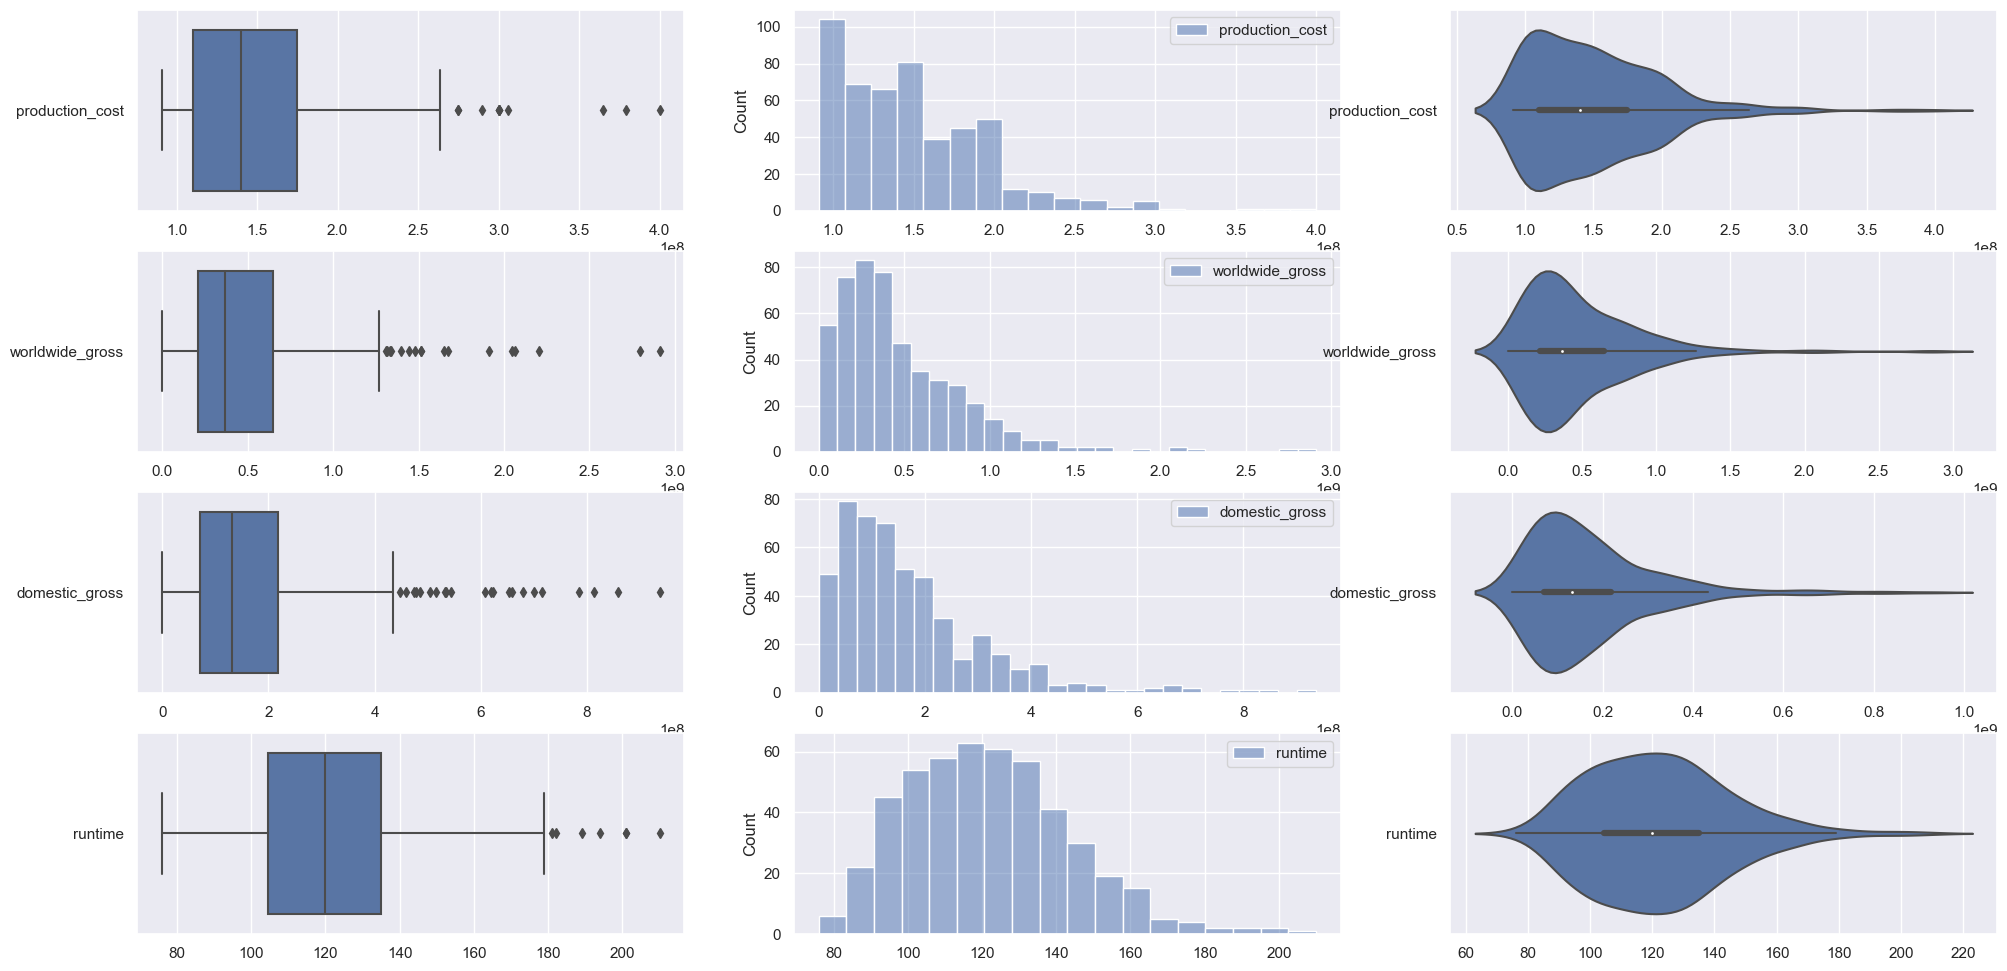

In [12]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(4, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for production_cost
sb.boxplot(data = production_cost, orient = "h", ax = axes[0,0])
sb.histplot(data = production_cost, ax = axes[0,1])
sb.violinplot(data = production_cost, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for percentage_worldwide
sb.boxplot(data = worldwide_gross, orient = "h", ax = axes[1,0])
sb.histplot(data = worldwide_gross, ax = axes[1,1])
sb.violinplot(data = worldwide_gross, orient = "h", ax = axes[1,2])


# Plot the basic uni-variate figures for percentage_domestic
sb.boxplot(data = domestic_gross, orient = "h", ax = axes[2,0])
sb.histplot(data = domestic_gross, ax = axes[2,1])
sb.violinplot(data = domestic_gross, orient = "h", ax = axes[2,2])


# Plot the basic uni-variate figures for percentage_domestic
sb.boxplot(data = runtime, orient = "h", ax = axes[3,0])
sb.histplot(data = runtime, ax = axes[3,1])
sb.violinplot(data = runtime, orient = "h", ax = axes[3,2])

In [5]:
# Calculate the quartiles
Q1 = production_cost.quantile(0.25)
Q3 = production_cost.quantile(0.75)

# Rule to identify outliers
rule = ((production_cost < (Q1 - 1.5 * (Q3 - Q1))) | (production_cost > (Q3 + 1.5 * (Q3 - Q1))))

# Count the number of outliers
rule.sum()

production_cost    11
dtype: int64

In [28]:
# Calculate the quartiles
Q1 = worldwide_gross.quantile(0.25)
Q3 = worldwide_gross.quantile(0.75)

# Rule to identify outliers
rule = ((worldwide_gross < (Q1 - 1.5 * (Q3 - Q1))) | (worldwide_gross > (Q3 + 1.5 * (Q3 - Q1))))

# Count the number of outliers
rule.sum()

worldwide_gross    17
dtype: int64

In [29]:
# Calculate the quartiles
Q1 = domestic_gross.quantile(0.25)
Q3 = domestic_gross.quantile(0.75)

# Rule to identify outliers
rule = ((domestic_gross < (Q1 - 1.5 * (Q3 - Q1))) | (domestic_gross > (Q3 + 1.5 * (Q3 - Q1))))

# Count the number of outliers
rule.sum()

domestic_gross    22
dtype: int64

,production_cost,worldwide_gross
production_cost,1.000000,0.537454
worldwide_gross,0.537454,1.000000


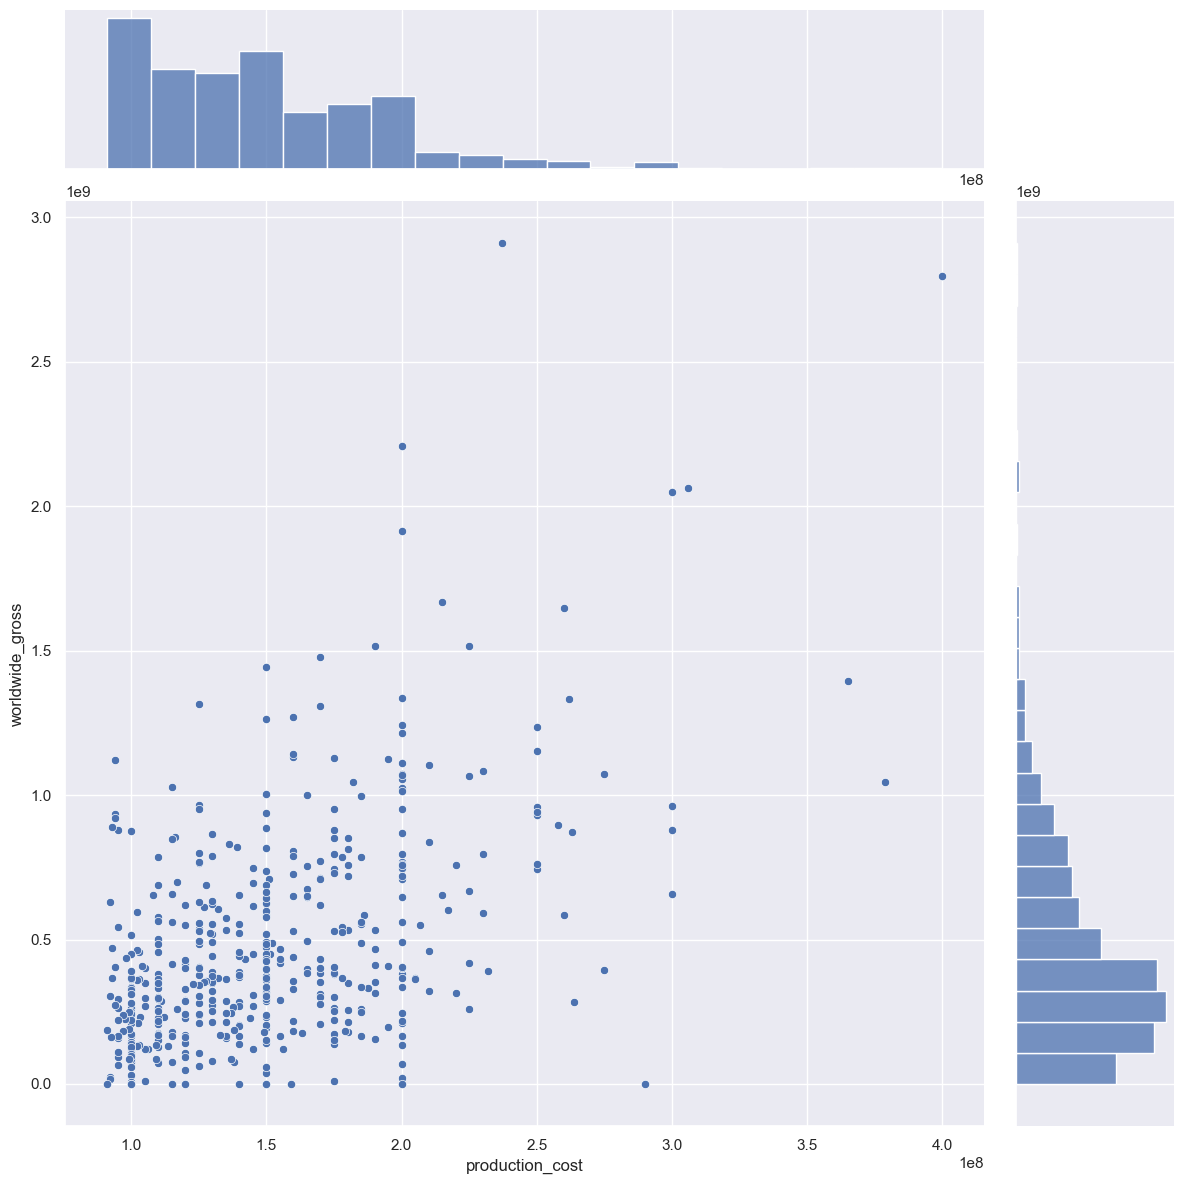

In [23]:
jointDFworldwide = pd.concat([production_cost, worldwide_gross], axis = 1).reindex(worldwide_gross.index)
jointDFworldwide
sb.jointplot(data = jointDFworldwide, x = "production_cost", y = "worldwide_gross", height = 12)
jointDFworldwide.corr()



,production_cost,domestic_gross
production_cost,1.000000,0.485815
domestic_gross,0.485815,1.000000


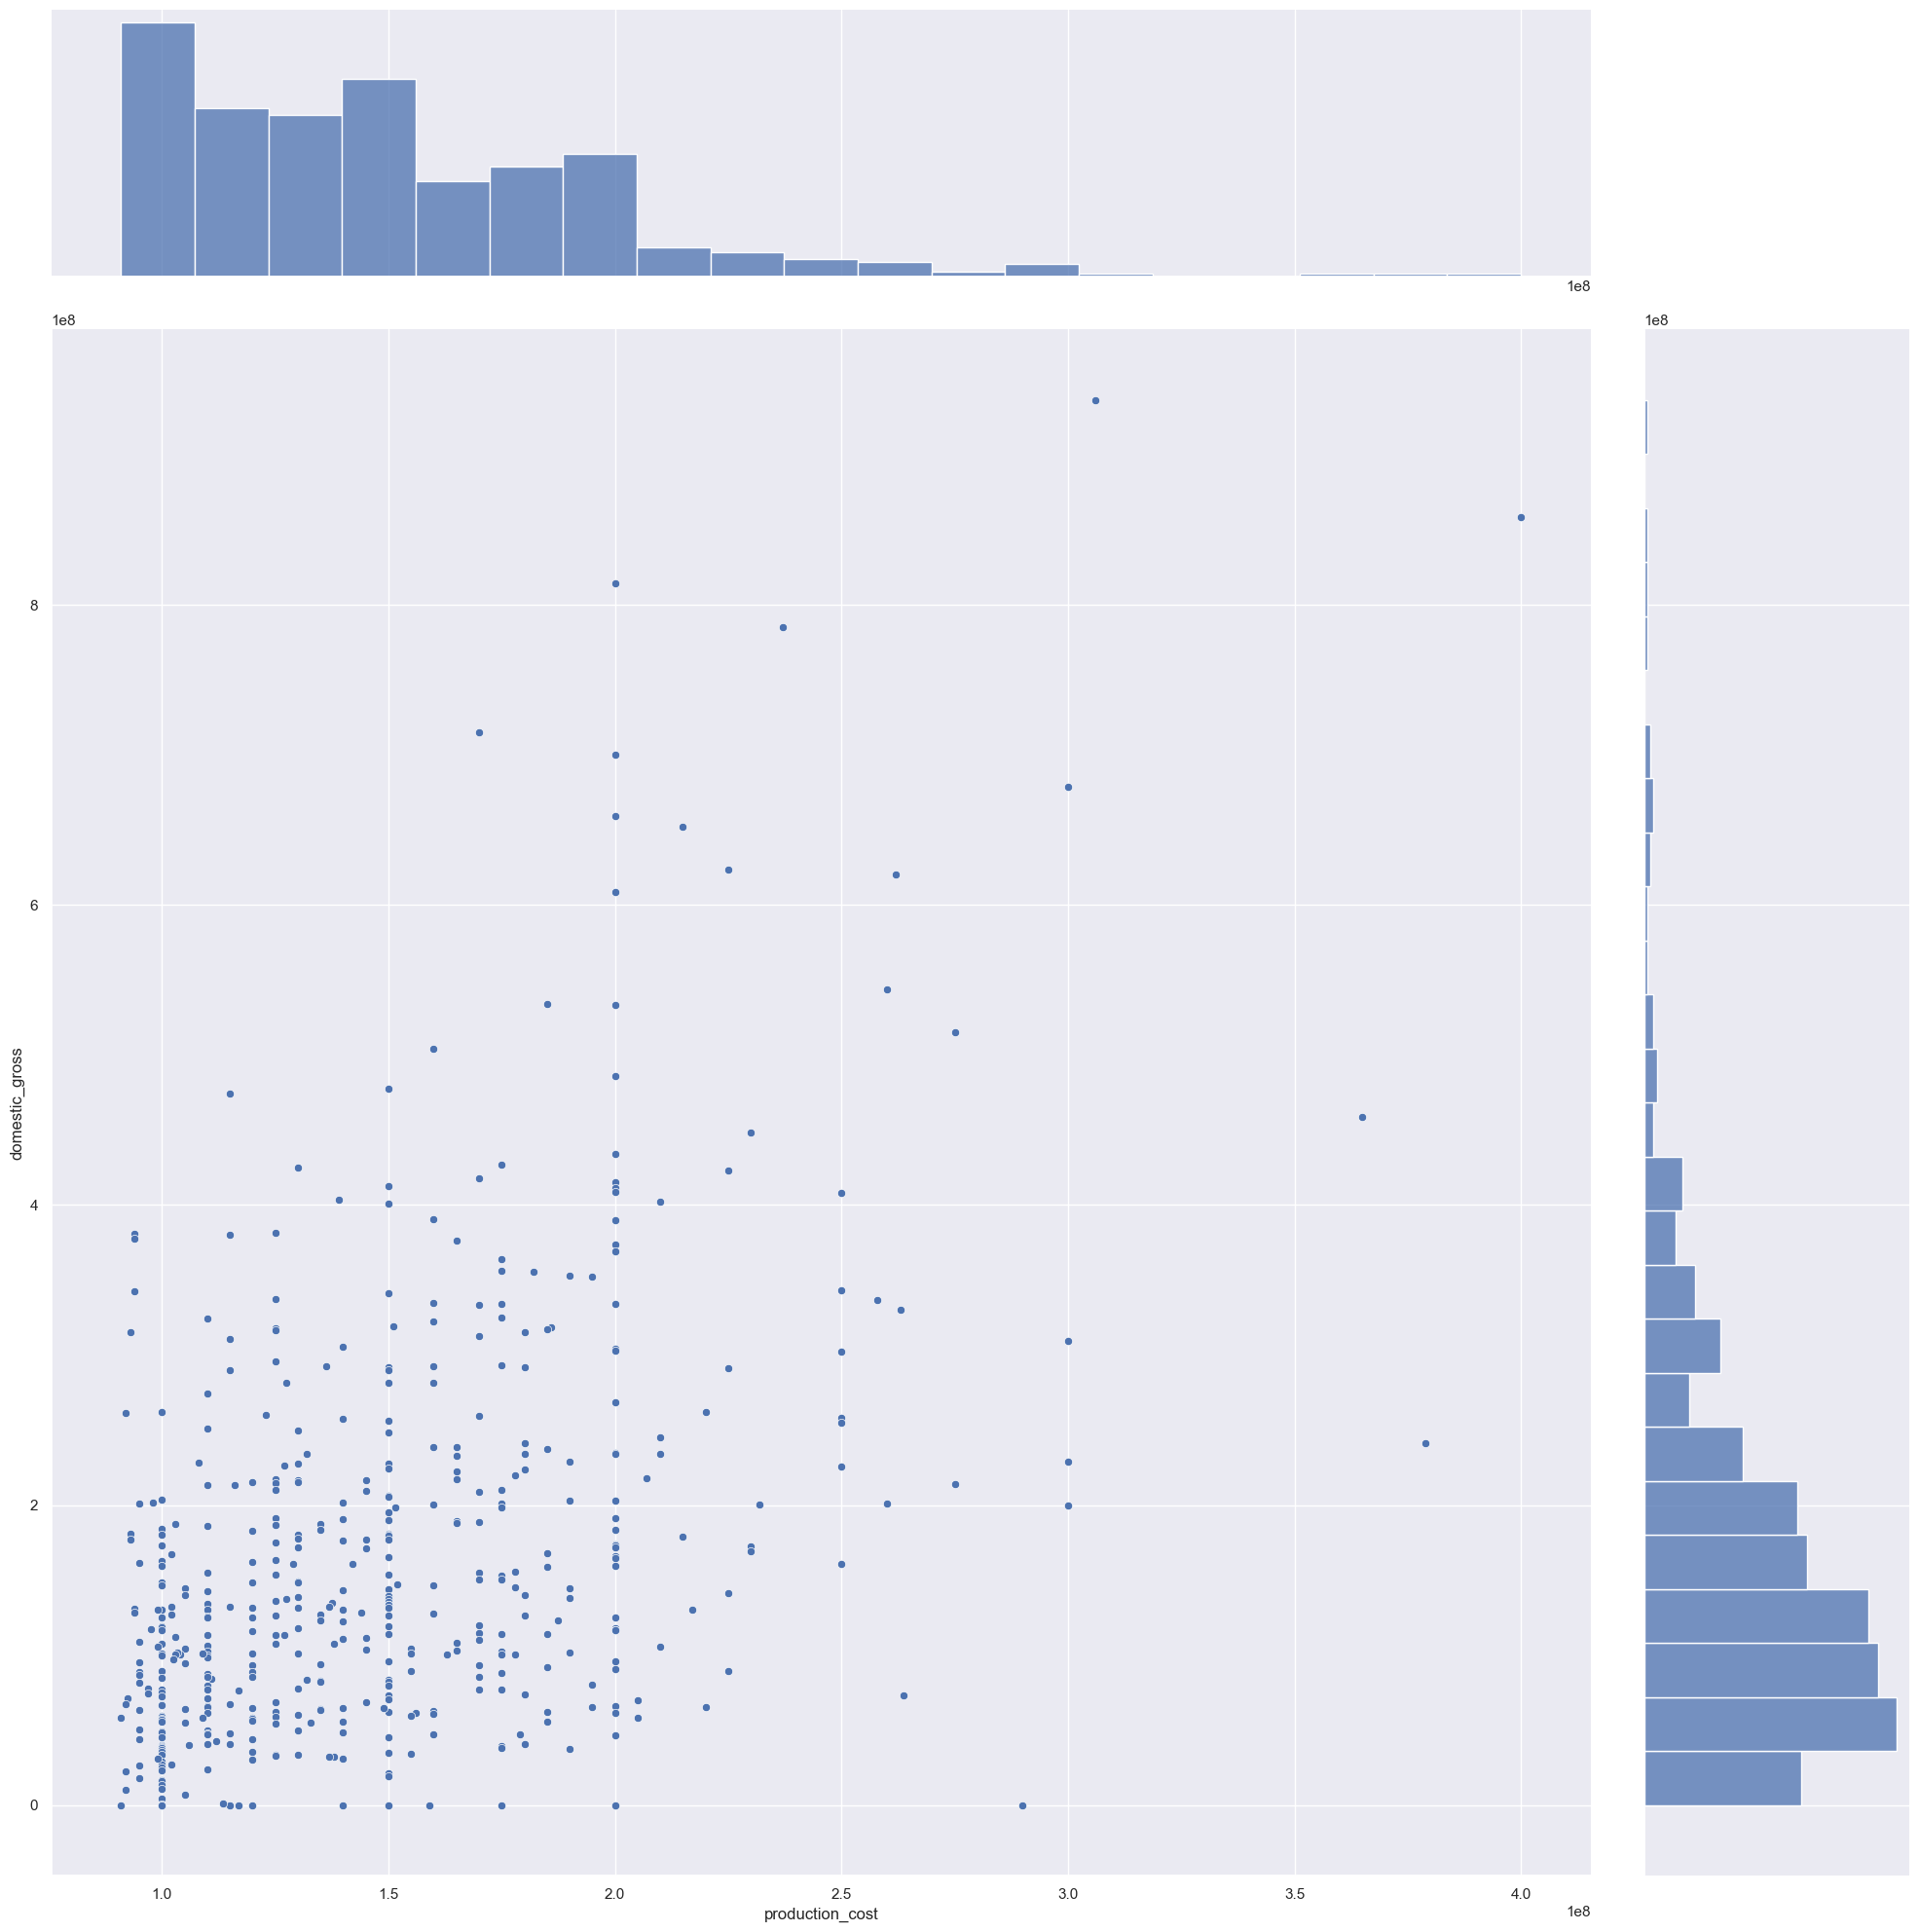

In [24]:
jointDFdomestic = pd.concat([production_cost, domestic_gross], axis = 1).reindex(domestic_gross.index)
jointDFdomestic
sb.jointplot(data = jointDFdomestic, x = "production_cost", y = "domestic_gross", height = 20)
jointDFdomestic.corr()

,production_cost,runtime
production_cost,1.000000,0.273057
runtime,0.273057,1.000000


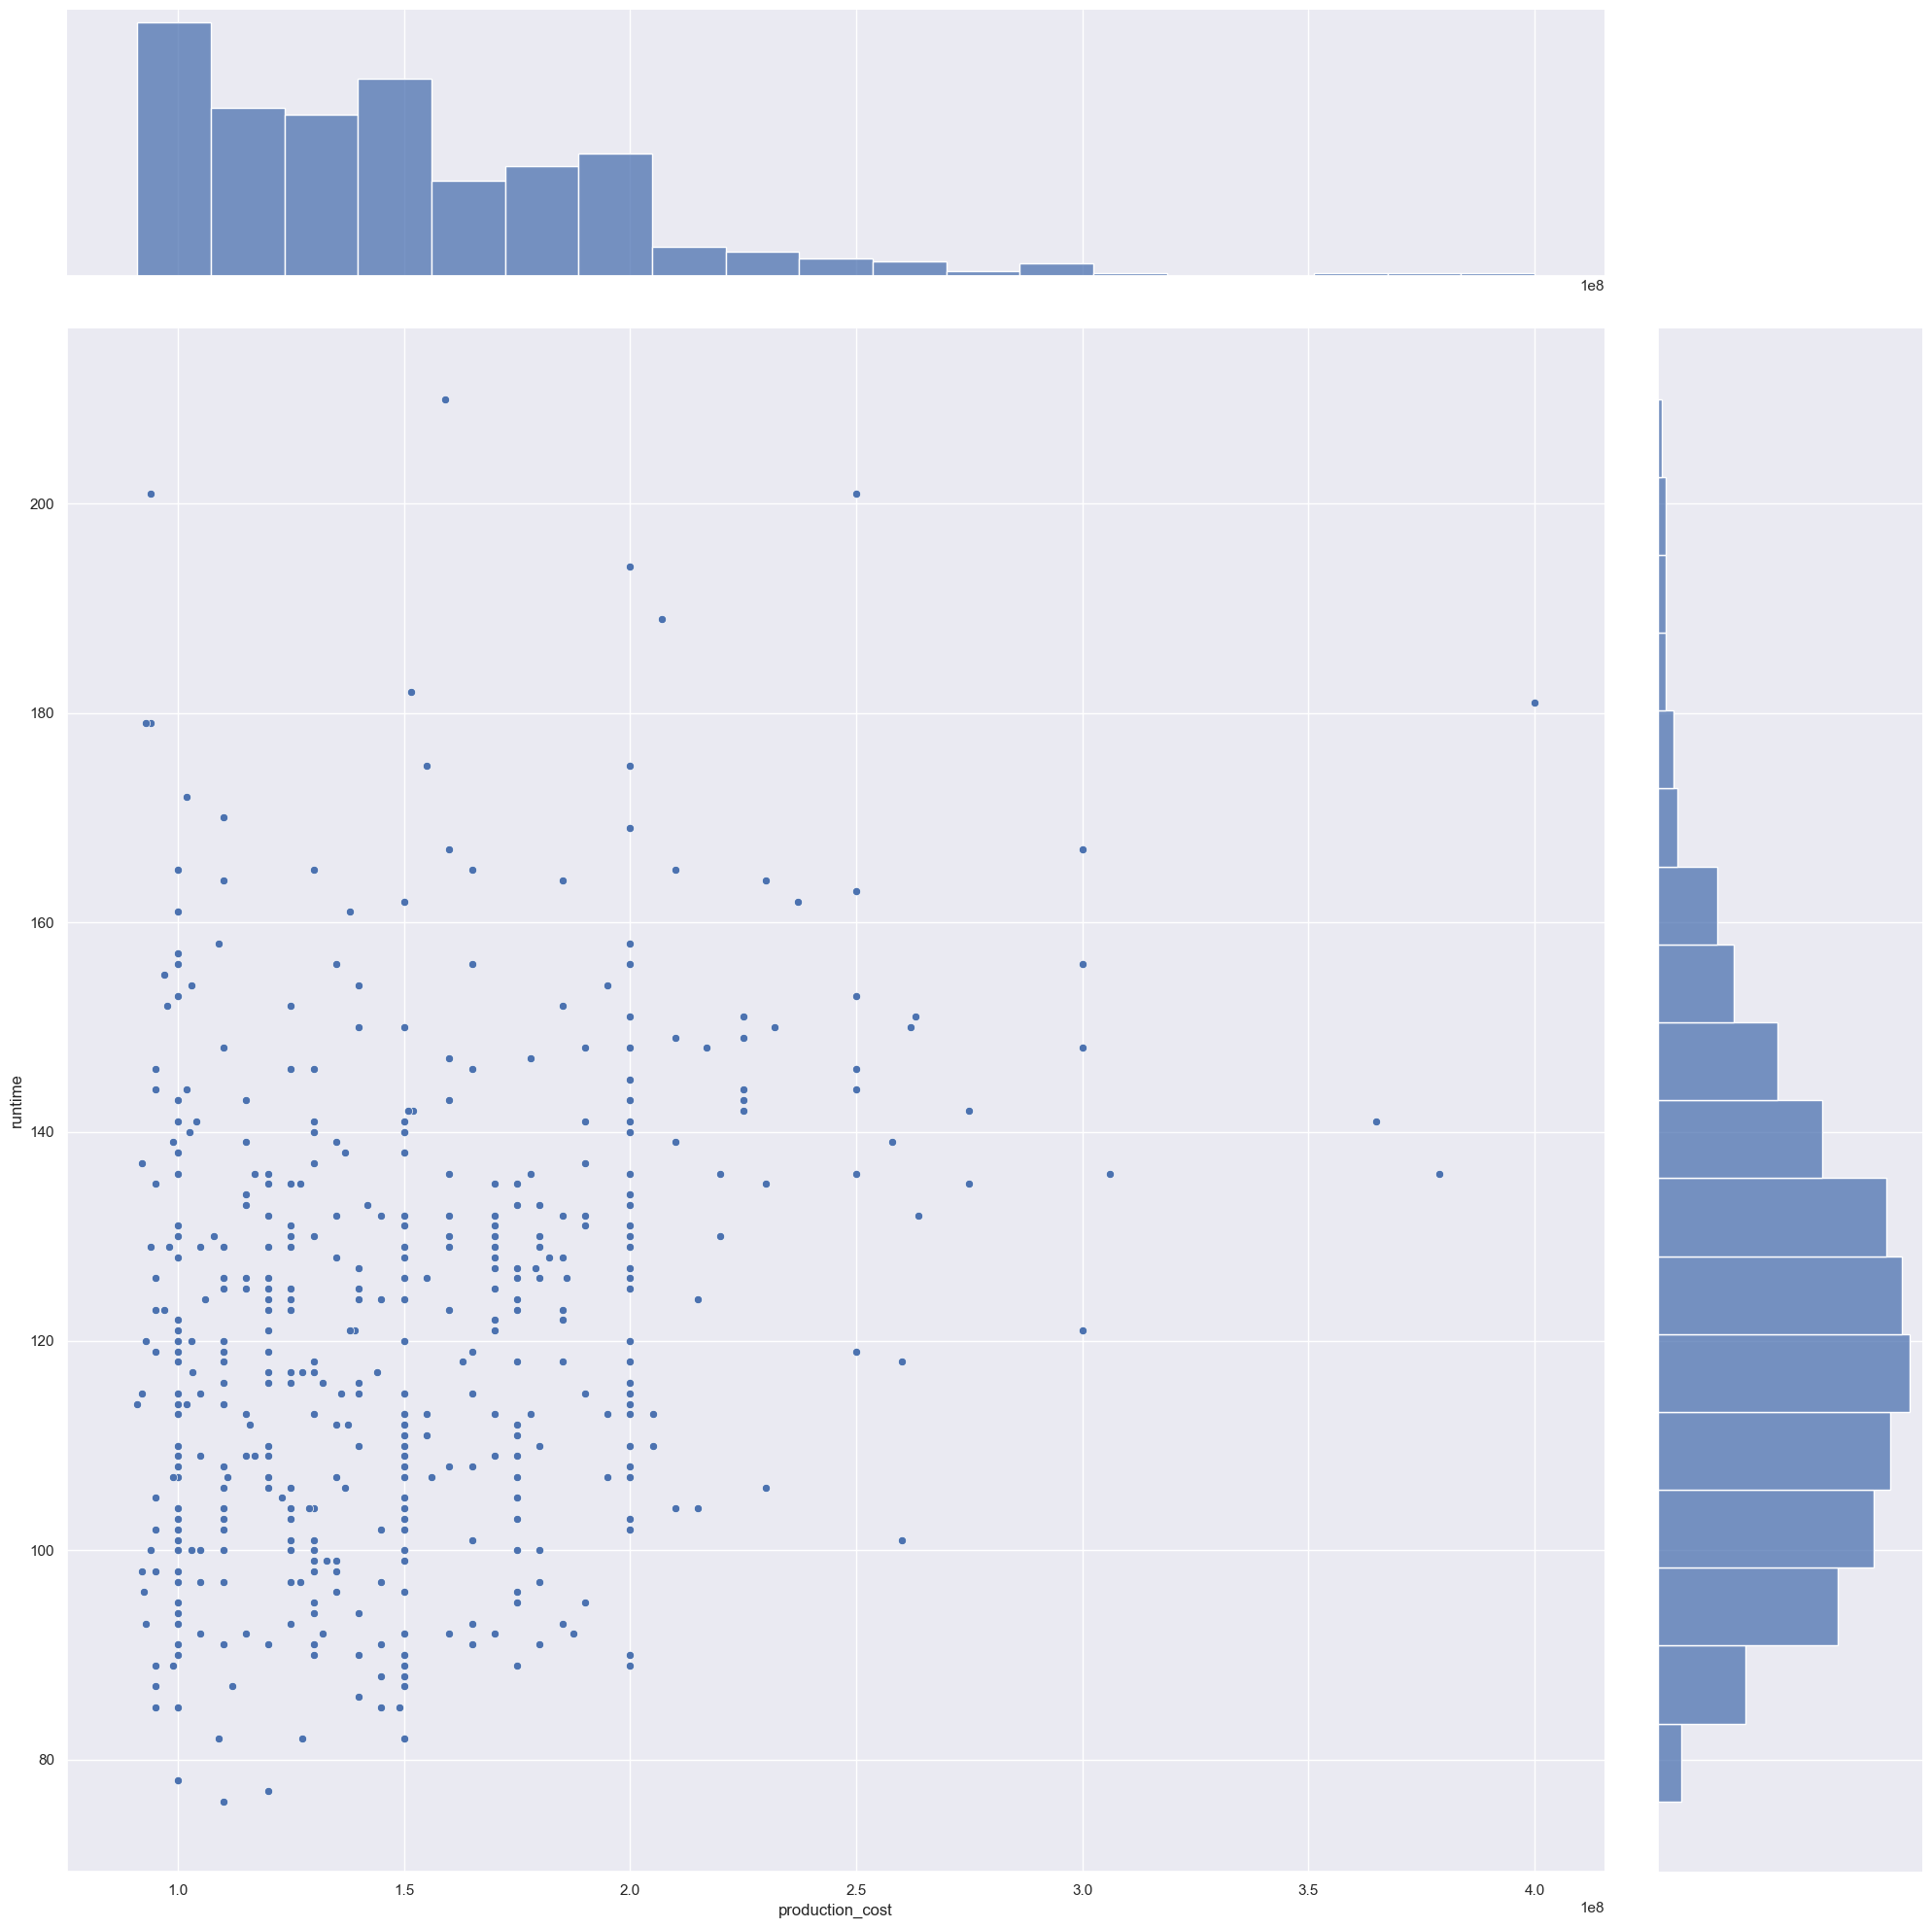

In [26]:
jointDFruntime = pd.concat([production_cost, runtime], axis = 1).reindex(runtime.index)
jointDFruntime
sb.jointplot(data = jointDFruntime, x = "production_cost", y = "runtime", height = 20)
jointDFruntime.corr()